###Importing SS Dataset


In [ ]:
!pip install roboflow

In [17]:
import os 
os.chdir('/content/RCNN')

In [ ]:
!git clone https://github.com/1297rohit/RCNN.git

Cloning into 'RCNN'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 25 (delta 4), reused 3 (delta 3), pack-reused 19
Unpacking objects: 100% (25/25), done.


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="AZV9J3dLwbjHdt6LrfXg")
project = rf.workspace("project1-awc5u").project("ss-5ozf3")
dataset = project.version(8).download("tensorflow")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to SS-8 in tensorflow:: 100%|██████████| 22/22 [00:00<00:00, 778.89it/s]


###Structure Sequence Data Preprocessing


In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import cv2 
import os 

In [20]:
data  = pd.read_csv("/content/RCNN/SS-9/train/_annotations.csv")

In [21]:
data.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,SS3_png.rf.184e54cf81abc73bacb7add95a01854f.jpg,416,416,SS,143,165,185,318
1,SS3_png.rf.184e54cf81abc73bacb7add95a01854f.jpg,416,416,SS,254,163,299,319
2,SS3_png.rf.184e54cf81abc73bacb7add95a01854f.jpg,416,416,SS,347,187,394,338
3,SS5_png.rf.cac800946deacdc2e04428156482708f.jpg,416,416,SS,146,163,185,320
4,SS5_png.rf.cac800946deacdc2e04428156482708f.jpg,416,416,SS,256,163,300,323


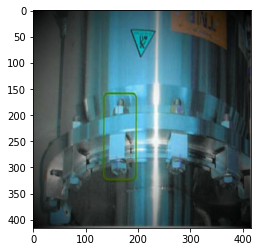

In [22]:
path ="/content/RCNN/SS-9/train/"
img =cv2.imread(os.path.join(path,data.filename[0]))
plt.imshow(img)

In [23]:
xmin =data.xmin[0]
xmax =data.xmax[0]
ymin =data.ymin[0]
ymax =data.ymax[0]

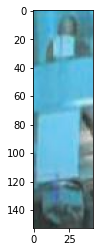

In [24]:
plt.imshow(img[ymin:ymax,xmin:xmax])

In [25]:
d=data.groupby("filename")

In [26]:
tmp =data[data.filename==data.filename[0]]
tmp

,filename,width,height,class,xmin,ymin,xmax,ymax
0,SS3_png.rf.184e54cf81abc73bacb7add95a01854f.jpg,416,416,SS,143,165,185,318
1,SS3_png.rf.184e54cf81abc73bacb7add95a01854f.jpg,416,416,SS,254,163,299,319
2,SS3_png.rf.184e54cf81abc73bacb7add95a01854f.jpg,416,416,SS,347,187,394,338


In [27]:
for i in range(tmp.shape[0]):
      print(tmp.xmin[i])

143
254
347


In [28]:
files=set(data.filename)
files

{'SS1_png.rf.4c3c9e40d8eddecb38ca436201ac19da.jpg',
 'SS1_png.rf.ad847d2ac7e5225dacb007866efd7048.jpg',
 'SS1_png.rf.afe54db5b2db6024caeb9c9f2adff1d6.jpg',
 'SS3_png.rf.184e54cf81abc73bacb7add95a01854f.jpg',
 'SS3_png.rf.2500bfbe56a1b5669e16ed0ce8b19dcd.jpg',
 'SS3_png.rf.47d647bfda169a2299b2800eadc11343.jpg',
 'SS5_png.rf.6954bf7add8754c4fd1379c24d1aad4a.jpg',
 'SS5_png.rf.6b15ce1100d682502c2fd64498eb9734.jpg',
 'SS5_png.rf.cac800946deacdc2e04428156482708f.jpg',
 'SS_png.rf.46c04bbafef882cf3d1389c49b2c4ca3.jpg',
 'SS_png.rf.9e78b51880af0fd1d270109c733eccf9.jpg',
 'SS_png.rf.bfd500145c2b8f4bbf8fad1f0fd415a2.jpg'}

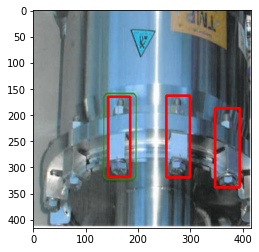

In [32]:
path ="/content/RCNN/SS-9/train/"
for i,j in enumerate(files): 
      temp = data[data.filename==j]
      img =cv2.imread(os.path.join(path,j))
      gtvalues=[]
      for i in range(tmp.shape[0]):
          x1 = tmp.xmin[i]
          x2 = tmp.xmax[i]
          y1 = tmp.ymin[i]
          y2 = tmp.ymax[i]          
          cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),3)
      plt.figure()
      plt.imshow(img)
      break

In [33]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [ ]:
!pip install opencv-contrib-python --upgrade

In [34]:
#import cv2
cv2.setUseOptimized(True);
sss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [36]:
path ="/content/RCNN/SS-9/train/"
train_images=[]
train_labels=[]
for i,j in enumerate(files): 
    temp = data[data.filename==j]
    img =cv2.imread(os.path.join(path,j))
    gtvalues=[]
    for i in range(tmp.shape[0]):
        x1 = tmp.xmin[i]
        x2 = tmp.xmax[i]
        y1 = tmp.ymin[i]
        y2 = tmp.ymax[i]
        gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
    sss.setBaseImage(img)
    sss.switchToSelectiveSearchFast()
    ssresults = sss.process()
    break

In [66]:
path ="/content/RCNN/SS-9/train/"
train_images=[]
train_labels=[]
for i,j in enumerate(files): 
    temp = data[data.filename==j]
    img =cv2.imread(os.path.join(path,j))
    gtvalues=[]
    for i in range(tmp.shape[0]):
        x1 = tmp.xmin[i]
        x2 = tmp.xmax[i]
        y1 = tmp.ymin[i]
        y2 = tmp.ymax[i]
        gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
    sss.setBaseImage(img)
    sss.switchToSelectiveSearchFast()
    ssresults = sss.process()
    imout = img.copy()
    counter = 0
    falsecounter = 0
    flag = 0
    fflag = 0
    bflag = 0
    for e,result in enumerate(ssresults):
      if e < 2000 and flag == 0:
          for gtval in gtvalues:
              x,y,w,h = result
              iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
              if counter < 1000:
                  if iou > 0.70:
                      timage = imout[y:y+h,x:x+w]
                      resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                      train_images.append(resized)
                      train_labels.append(1)
                      counter += 1
              else :
                  fflag =1
              if falsecounter <10:
                  if iou < 0.3:
                      timage = imout[y:y+h,x:x+w]
                      resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                      train_images.append(resized)
                      train_labels.append(0)
                      falsecounter += 1
              else :
                  bflag = 1
          if fflag == 1 and bflag == 1:
              print("inside")
              flag = 1

In [ ]:
temp=os.listdir(annot)[:20]
for e,i in enumerate(temp):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <10:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

In [67]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [69]:
len(y_new[y_new==0])

120

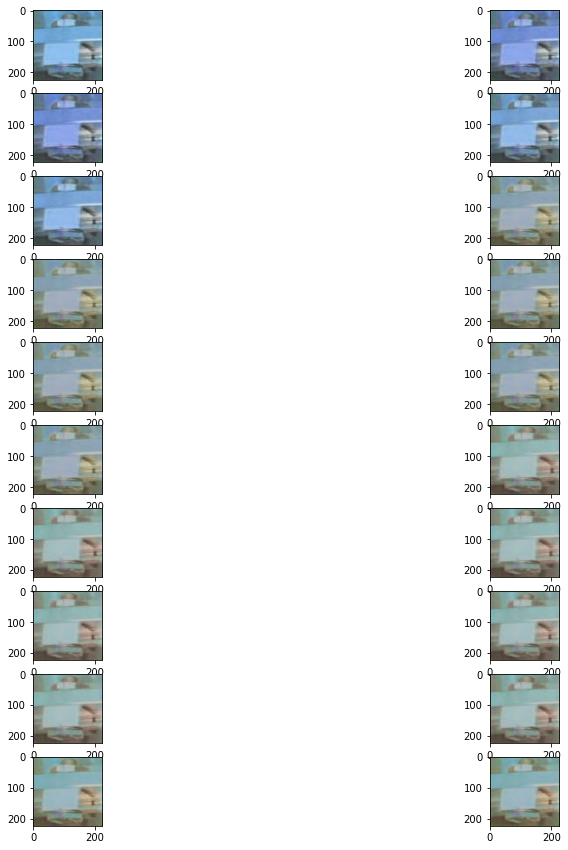

In [72]:
plt.figure(figsize=(15,15))
c=0
for i in range(1,100):
  if y_new[i]==1:
      c+=1
      plt.subplot(10,2,c)
      plt.imshow(X_new[i])
      if c==20:
         break
  else:
      pass

In [80]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import tensorflow as tf

In [74]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [75]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [76]:
X= vggmodel.layers[-2].output

In [77]:
predictions = Dense(2, activation="softmax")(X)

In [81]:
input =tf.keras.layers.Input(shape=(None,224,224,3))

In [82]:
model_final = Model(inputs = vggmodel.input, outputs = predictions)

In [83]:
#from keras.optimizers import Adam
#opt = Adam(lr=0.0001)

In [85]:
model_final.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer ="adam", metrics=["accuracy"])

In [86]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [88]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [89]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [90]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [91]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(146, 224, 224, 3) (17, 224, 224, 3) (146, 2) (17, 2)


In [92]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [100]:
traindata.n

146

In [93]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [94]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 5, epochs= 30, validation_data= testdata, validation_steps=2, callbacks=[early])

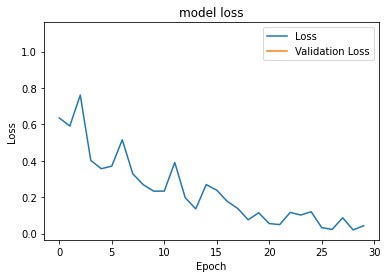

<Figure size 432x288 with 0 Axes>

In [101]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

In [107]:
y_test

array([[1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1]])

Predicted : not SS
Actual : 1


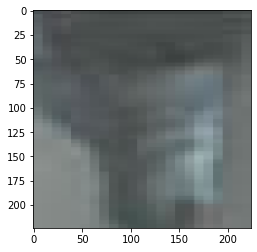

In [110]:
c=2
im = X_test[c]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("Predicted : SS")
    print("Actual : "+str(y_test[c][0]))
else:
    print("Predicted : not SS")
    print("Actual : "+str(y_test[c][1]))

In [ ]:
z=0
for e,i in enumerate(temp):
    if i.startswith("4"):
        z += 1
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.65:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)

In [116]:
img

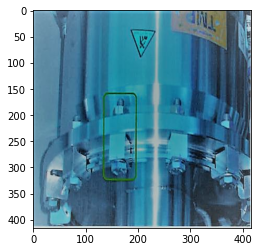

In [142]:
img = cv2.imread('/content/RCNN/SS-9/test/SS2_png.rf.8e5a3e7a82b0aa83d58896d180275e7a.jpg')
sss.setBaseImage(img)
sss.switchToSelectiveSearchFast()
ssresults = sss.process()
imout = img.copy()
for e,result in enumerate(ssresults):
    if e < 2000:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model_final.predict(img)
        if out[0][0] > 1.00:
              cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

In [134]:
img = cv2.imread('/content/RCNN/SS-9/test/SS2_png.rf.8e5a3e7a82b0aa83d58896d180275e7a.jpg')


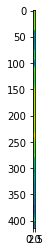

In [135]:
plt.imshow(img[0][y:y+h,x:x+w])

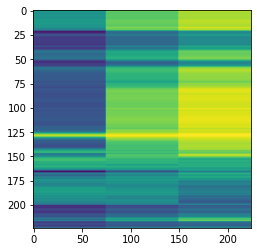

In [136]:
resized = cv2.resize(img[0][y:y+h,x:x+w], (224,224), interpolation = cv2.INTER_AREA)
plt.imshow(resized)

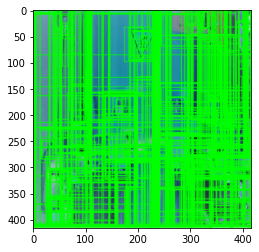

In [126]:
plt.imshow(imout)